In [35]:
# Import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

ds = pd.read_csv('data.csv') #as double array (csv)
r, c = ds.shape

In [62]:
#DATA BY CATEGORIES (in listed arrays):
covid = ["covid", "covid19", "covid-19", "covid 19", "coronavirus", "corona-virus"
        "pandemic", "quarantine", "spread", "distancing", "antibodies", "vaccine"
        "sars-Ccov-2", "face covering", "mask", "pfiser", "moderna", "virus", "disinfectant", "lockdown"]

symptoms = ["anosmia", "fever" ,"chills", "cough", "breath", "breathing", "fatigue",
           "muscle", "body", "ache", "headache", "taste", "smell", "sore", "throat"
           "congestion", "nose", "nausea", "vomiting", "diarrhea", "pain"
           "pressure in the chest", "pale", "lips", "nail", "brain", "telehealth"]

recovery = ["office", "commute", "traffic", "reopen", "recovery", "revive", "work", "return", "permit", "commute", "HVAC", "lockdown"]

retail = ["cloths", "clothes", "cosmetics", "beauty", "retail", "store", "opening hour", "shopping", "newburry", "newbury"]

outdoors = ["booking", "flight", "train", "hotel", "shuttle", "bus", "subway", "camping", "campervan", "fishing", 
            "park", "zoo", "aquarium", "tourist", "attractions", "fenway", "boston common", "public park", "museum"
            "trail", "tour", "show", "bicycles", "accessories", "vacation", "resort", "congestion", "transportation", "economy", "economic", "recovery"]

categ_data = [covid, symptoms, recovery, retail, outdoors]
categ_data_lyrics = ["COVID", "SYPMTOMS", "RECOVERY", "RETAIL", "OUTDOORS"]

In [22]:
def remove_special_characters(word):
    characters = ['"', ".", ",", "?", "!", "'"]
    for char in characters:
        word = word.replace(char, "")
    return word

In [23]:
def count_word_intext(text, word):
    split_text = text.split()
    counter = 0
    for lyric in split_text:
        lyric = remove_special_characters(lyric)
        if(lyric == word):
            counter += 1
    return counter

In [77]:
row = 0
categ_data_count = []
month_dates = []
row = 1
for row in range(r ):
    date, title, text = math.floor(ds.iat[row, 0] / 100), ds.iat[row, 1], ds.iat[row, 2]
    if(date == math.floor(ds.iat[row - 1, 0] / 100)):
        text += ds.iat[row - 1, 1]
    else:
        month_dates.append(date)
        date_count = []
        for categ in categ_data:
            ind_categ_data_count = []
            count = 0
            for word in categ:
                cwit = count_word_intext(text, word)
                t = (word, cwit)
                count += cwit
                ind_categ_data_count.append(t)
            date_count.append((ind_categ_data_count, count))
        categ_data_count.append(date_count)
    
#categ_data_count is an array of
    #data_count is an array of tuples (
        #ind_categ_data_count is an array of
            #tuples (word, word-count)
        #cwit = total count of all words from that category in that text (of one date)
    # )
            


In [78]:
x = month_dates
ys = []
for date_item in categ_data_count:
    for category in date_item:
        categ_count_perdate = []
        for count_tuple in category:
            categ_count_perdate.append(count_tuple)
        ys.append(categ_count_perdate)  
        
month_dates

[202105,
 202104,
 202103,
 202102,
 202101,
 202012,
 202011,
 202010,
 202009,
 202008,
 202007,
 202006,
 202005,
 202004,
 202003,
 202002]

In [79]:
texts = []
for md in month_dates:
    texts.append("")
    
def get_val_index(md, arr):
    for i in range(len(arr)):
        if (arr[i] == md):
            return i
    return len(arr) - 1

for row in range (r):
    date, title, text = math.floor(ds.iat[row, 0] / 100), ds.iat[row, 1], ds.iat[row, 2]
    texts[get_val_index(date, month_dates)] += text
    
ctys = []
for t in texts:
    ys = []
    for c in categ_data:
        count = 0
        for w in c:
            count += count_word_intext(t, w)
        ys.append(count)
    ctys.append(ys)
        


In [80]:
def transpose_mtx(li1, li2):
    li2 =[[row[i] for row in li1] for i in range(len(li1[0]))]
    return li2

nctys = transpose_mtx(ctys, [])
for i in range(len(nctys)):
    nctys[i] = nctys[i][::-1]
    
nctys

[[30, 14, 18, 5, 0, 28, 14, 12, 7, 6, 2, 5, 6, 1, 1, 4],
 [7, 2, 1, 0, 0, 1, 2, 0, 3, 4, 0, 0, 6, 0, 0, 0],
 [18, 18, 6, 11, 9, 35, 32, 12, 9, 27, 14, 7, 9, 4, 5, 25],
 [0, 1, 3, 1, 0, 3, 2, 0, 0, 7, 3, 0, 0, 2, 0, 3],
 [7, 9, 5, 3, 0, 21, 35, 11, 0, 22, 6, 14, 0, 10, 1, 9]]

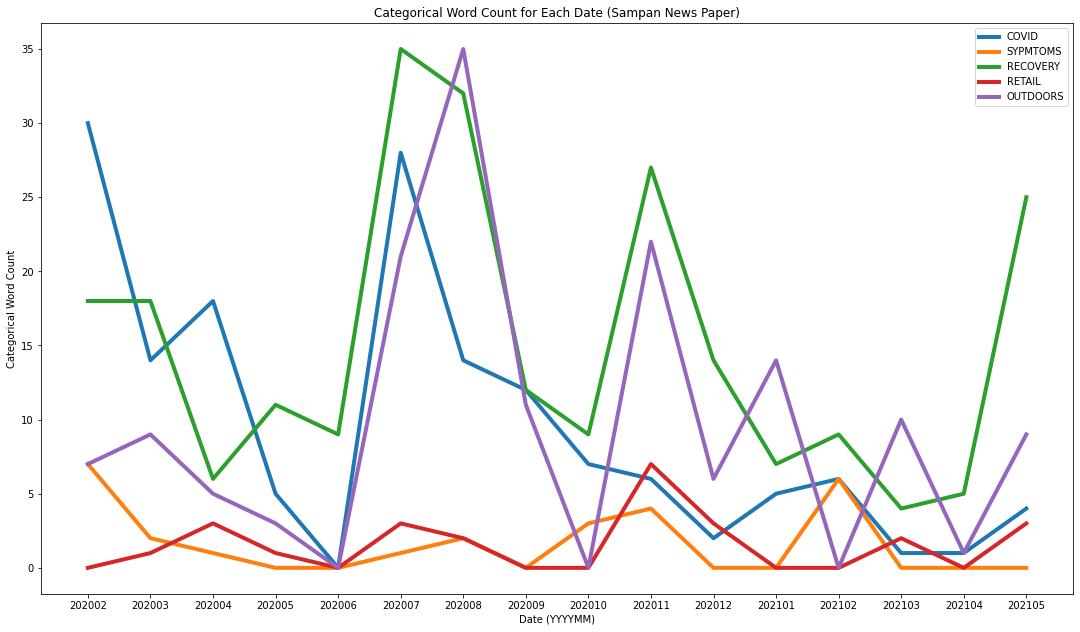

In [82]:
#graph:
colors = ["r", "b", "g", "y", "k"]
i = 0

#make graph look bigger
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

mds = []
for i in month_dates:
    mds.append(str(i))
mds = mds[::-1]
    
for i in range(len(nctys)):
    plt.plot(mds, nctys[i], label = categ_data_lyrics[i], linewidth=4.0)

plt.legend()
plt.xlabel("Date (YYYYMM)")
plt.ylabel("Categorical Word Count")
plt.title("Categorical Word Count for Each Date (Sampan News Paper)")
plt.show()
